# We are going to perform sentiment Analysis
# EDA (Explanatory data analysis ) for positive sentiments
# EDA (Explanatory data analysis ) for negative sentiments
# Create Wordclouds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob  import TextBlob
#from wordcloud import wordCloud,STOPWORDS
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import emoji
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import os
import netCDF4 as nc

In [2]:
import os
print(os.getcwd())

C:\Users\Admin\Documents\PYTHON\Udemy


In [3]:
 comments=pd.read_csv("GBcomments.csv",error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [4]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [5]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [6]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace=True)

In [8]:
polarity=[]
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [9]:
comments['polarity']=polarity
comments.head(20)


video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   
16  jt2OHQh0HoQ  They really just took the samsung s8 and named...      0   
17  jt2OHQh0HoQ  so if someone has a twin sibling both can unlo...      0   
18  jt2OHQh0HoQ             For god sake its better than my ps4pro      0   
19  jt2OHQh0HoQ     7mp cam what kind of standard is this in 2017?      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000  
15        0  0.500000  
16        0  0.200000  
17        0  0.250000  
18        0  0.500000  
19        0  0.300000

In [10]:
comment_positive=comments[comments['polarity']==1]


In [11]:
comment_positive.shape

(20400, 5)

In [12]:
comment_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [13]:
!pip install wordcloud

In [14]:
stopwords=set(STOPWORDS)

In [15]:
total_comments='' .join(comment_positive['comment_text'])

In [16]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

# Wordcloud for positive sentiments


(-0.5, 999.5, 499.5, -0.5)

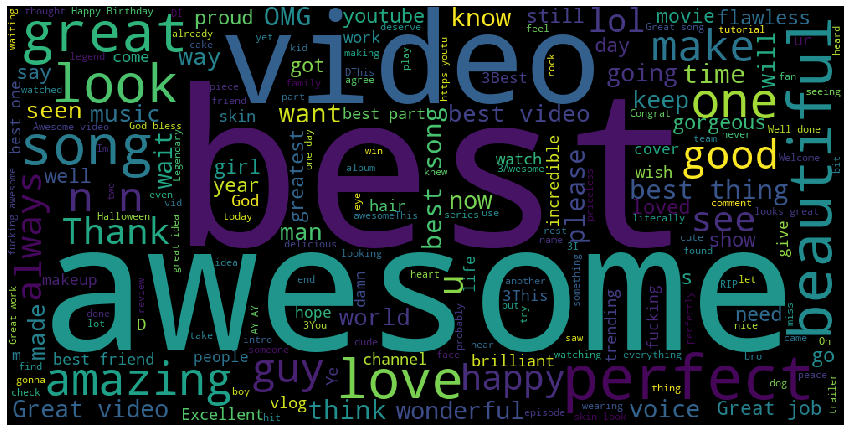

In [17]:

plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')


In [18]:
comment_negative=comments[comments['polarity']==-1]


In [19]:
total_comment='' .join(comment_negative['comment_text'])

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comment)

# Wordcloud for negative sentiments

(-0.5, 999.5, 499.5, -0.5)

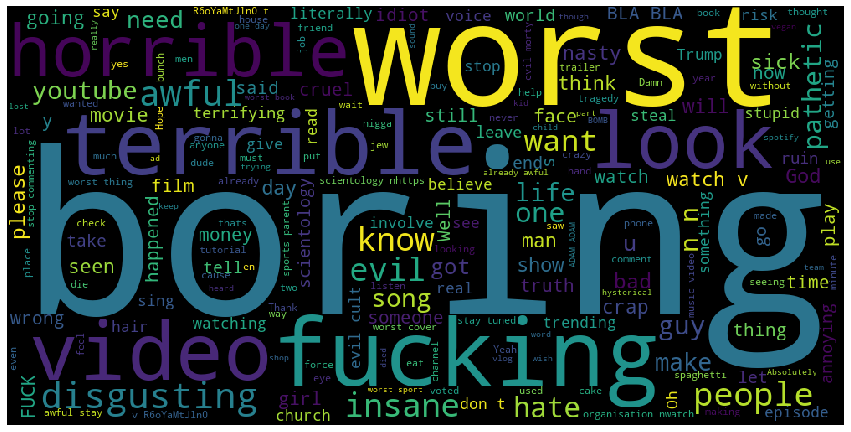

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing Trending Tags and Views of Youtube

In [22]:
videos=pd.read_csv("USvideos.csv",error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [23]:
videos

video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1     K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2     cLdxuaxaQwc                                        My Response   
3     WYYvHb03Eog                          Apple iPhone X first look   
4     sjlHnJvXdQs                                  iPhone X (parody)   
...           ...                                                ...   
7987  xlu6i6lT_vk                     How Do MASSIVE Sinkholes Form?   
7988  qRoVlH1OcI4  Trump slams Clinton for defending NFL anthem p...   
7989  EoejGgUNmVU  LP - Lost On You (A Night at The McKittrick Ho...   
7990  MT1CMTI0EVw  Tré Melvin @ #YouTubeBlack FanFest Washington ...   
7991  AFxLA3RGjnc  First cosmic event seen in gravitational waves...   

                    channel_title  category_id  \
0                Logan Paul Vlogs           24   
1                           Apple           28   
2                       PewDiePie           22   
3                       The Verge           28   
4                      jacksfilms           23   
...                           ...          ...   
7987                  Life Noggin           27   
7988             Business Insider           25   
7989                           LP           10   
7990              YouTube FanFest           24   
7991  National Science Foundation           28   

                                                   tags    views   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1     Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                                [none]  5845909  576597   
3     apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4     jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
...                                                 ...      ...     ...   
7987  sinkhole|how do sinkholes form|sinkhole in wat...   440393   14362   
7988  Business Insider|Donald Trump|Hillary Clinton|...    55762    1265   
7989  LP|Death Valley|Other People|Lost On You|The M...   142908    7088   
7990  YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...    24532    2148   
7991  LIGO|Virgo|collaboration|space|science|nationa...   144039    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [24]:
tags_complete=  ''.join(videos["tags"])

In [25]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 lifeApple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone[none]apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|vergejacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emojia24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar winne

In [26]:
tags=re.sub('[^ a-zA-Z]' ,' ',tags_complete)


In [27]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   lifeApple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge vergejacksfilms parody parodies iphone iphone x iphone   apple emojia   a   films a   trailers independent films trailer HD official movie film a   movies oscar winne

In [28]:
tags=re.sub("  ",'',tags)

In [29]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang lifeApple iPhoneiPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x eventapple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphoneapple iphone iosthe verge vergejacksfilms parody parodies iphone iphone x iphone apple emojia a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster Artist r

In [30]:
wordcloud1=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

# Wordcloud for trending texts in youtube

(-0.5, 999.5, 499.5, -0.5)

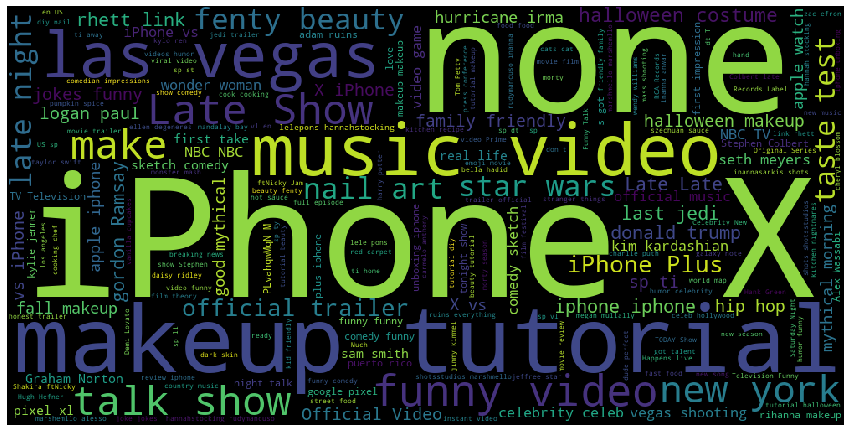

In [31]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud1)
plt.axis('off')

# Analysis on likes, dislikes, views and find out how they are correlated with each other

Text(0.5, 1.0, 'Regression plot for views &likes ')

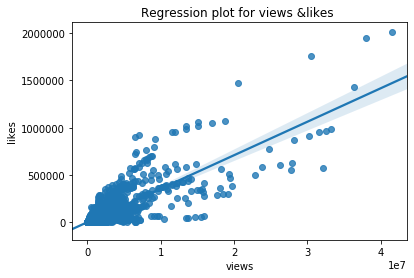

In [32]:
sns.regplot(data=videos,x="views",y="likes")
plt.title("Regression plot for views &likes ")

Text(0.5, 1.0, 'Regression plot for views &dislikes ')

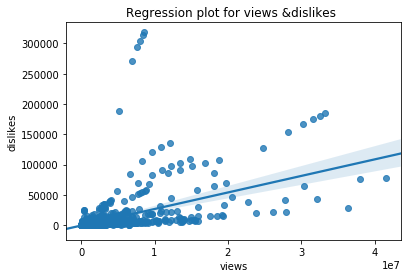

In [33]:
sns.regplot(data=videos,x="views",y="dislikes")
plt.title("Regression plot for views &dislikes ")

In [34]:
df_corr=videos[['views','likes','dislikes']]

In [35]:
df_corr

views   likes  dislikes
0     4394029  320053      5931
1     7860119  185853     26679
2     5845909  576597     39774
3     2642103   24975      4542
4     1168130   96666       568
...       ...     ...       ...
7987   440393   14362       390
7988    55762    1265       760
7989   142908    7088        68
7990    24532    2148        77
7991   144039    1574        59

[7992 rows x 3 columns]

In [36]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

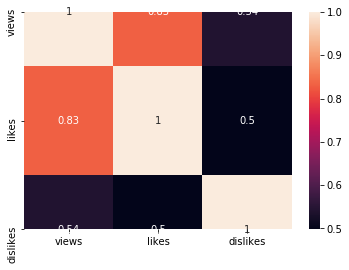

In [37]:
sns.heatmap(df_corr.corr(),annot=True)

In [38]:
x=videos['views']

In [39]:
x.max()
np.mean(x)

939026.9064064064

In [40]:
comment=comments['comment_text'][1]

In [41]:
print("\U0001F600")

😀


In [42]:
!pip install emoji


In [43]:
len(comments)

718424

In [44]:
import emoji

In [45]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [46]:
comment=comments['comment_text'][1]


In [47]:
[n for n in comment if n in emoji.UNICODE_EMOJI]

[]

In [48]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele
    
    

In [49]:
len(str)

0

# Stock data analysis

In [247]:
# path='C:\Users\Admin\Documents\PYTHON\Udemy'
# company_list=["AAPL_data.csv",'GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
# all_data=pd.DataFrame()
# for file in company_list:
#     current_df=pd.read_csv(path+'/'+file)
#     all_data=pd.concat([all_data,current_df])
# all_data.shape
    

In [248]:
a=pd.read_csv("AAPL_data.csv")
b=pd.read_csv("GOOG_data.csv")
c=pd.read_csv("MSFT_data.csv")
d=pd.read_csv("AMZN_data.csv")


In [249]:
all_data=pd.concat([a,b,c,d])
all_data


date       open       high        low      close     volume  Name
0     2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL
1     2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL
2     2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL
3     2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL
4     2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL
...          ...        ...        ...        ...        ...        ...   ...
1254  2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN
1255  2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN
1256  2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN
1257  2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN
1258  2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN

[4752 rows x 7 columns]

In [250]:
tech_list=all_data['Name'].unique()
tech_list


array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

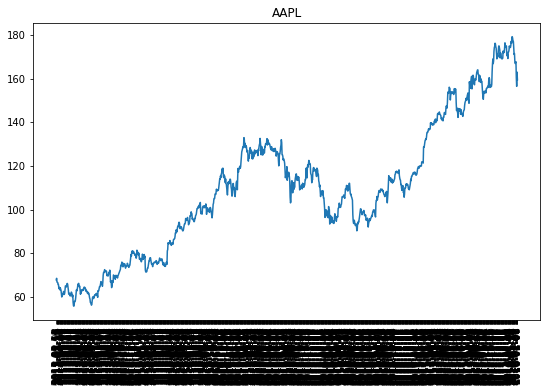

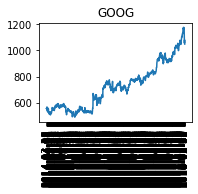

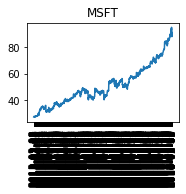

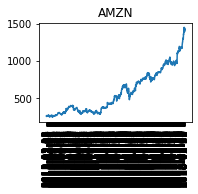

In [251]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)
    plt.show()

In [252]:
all_data['date']=pd.to_datetime(all_data['date'])

In [253]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [254]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [255]:
for i,company in enumerate(tech_list,1):
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

# Analyzing Daily Returns

In [256]:
df=pd.read_csv("AAPL_data.csv")

In [257]:
df

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [258]:
df['Daily_Price_change']=df['close']-df['open']

In [259]:
df['1day % return']=((df['close']-df['open'])/(df['close']))*100

In [260]:
df

date      open      high       low     close     volume  Name  \
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL   
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL   
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL   
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL   
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL   
...          ...       ...       ...       ...       ...        ...   ...   
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL   
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL   
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL   
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL   
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL   

      Daily_Price_change  1day % return  
0                 0.1400       0.206325  
1                 0.4900       0.714688  
2                -1.6586      -2.481344  
3                -0.0286      -0.042869  
4                 0.2957       0.443624  
...                  ...            ...  
1254              0.6150       0.366551  
1255             -5.5000      -3.426791  
1256             -2.6100      -1.667838  
1257              8.2000       5.029749  
1258             -3.5450      -2.222013  

[1259 rows x 9 columns]

In [261]:
fig=px.line(df,x='date',y='1day % return',title='AMZN')
fig.show()

# Analyse whether stock prices of these tech companies (Amazon, Apple, Google, Microsoft) are correlated or not. 

In [262]:
a=pd.read_csv("AAPL_data.csv")
b=pd.read_csv("GOOG_data.csv")
c=pd.read_csv("MSFT_data.csv")
d=pd.read_csv("AMZN_data.csv")

In [263]:
all=pd.concat([a,b,c,d])


In [264]:
all


date       open       high        low      close     volume  Name
0     2013-02-08    67.7142    68.4014    66.8928    67.8542  158168416  AAPL
1     2013-02-11    68.0714    69.2771    67.6071    68.5614  129029425  AAPL
2     2013-02-12    68.5014    68.9114    66.8205    66.8428  151829363  AAPL
3     2013-02-13    66.7442    67.6628    66.1742    66.7156  118721995  AAPL
4     2013-02-14    66.3599    67.3771    66.2885    66.6556   88809154  AAPL
...          ...        ...        ...        ...        ...        ...   ...
1254  2018-02-01  1445.0000  1459.8800  1385.1400  1390.0000    9113808  AMZN
1255  2018-02-02  1477.3900  1498.0000  1414.0000  1429.9500   11125722  AMZN
1256  2018-02-05  1402.6200  1458.9800  1320.7200  1390.0000   11494985  AMZN
1257  2018-02-06  1361.4600  1443.9900  1351.7900  1442.8400   11066819  AMZN
1258  2018-02-07  1449.0000  1460.9900  1415.1500  1416.7800    7162741  AMZN

[4752 rows x 7 columns]

In [265]:
close=pd.DataFrame()
close

Empty DataFrame
Columns: []
Index: []

In [266]:
close['aapl']=a['close']
close['goog']=b['close']
close['msft']=c['close']
close['amzn']=d['close']

In [267]:
close

aapl    goog   msft     amzn
0      67.8542  558.46  27.55   261.95
1      68.5614  559.99  27.86   257.21
2      66.8428  556.97  27.88   258.70
3      66.7156  567.16  28.03   269.47
4      66.6556  567.00  28.04   269.24
...        ...     ...    ...      ...
1254  167.7800     NaN  94.26  1390.00
1255  160.5000     NaN  91.78  1429.95
1256  156.4900     NaN  88.00  1390.00
1257  163.0300     NaN  91.33  1442.84
1258  159.5400     NaN  89.61  1416.78

[1259 rows x 4 columns]

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Admin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



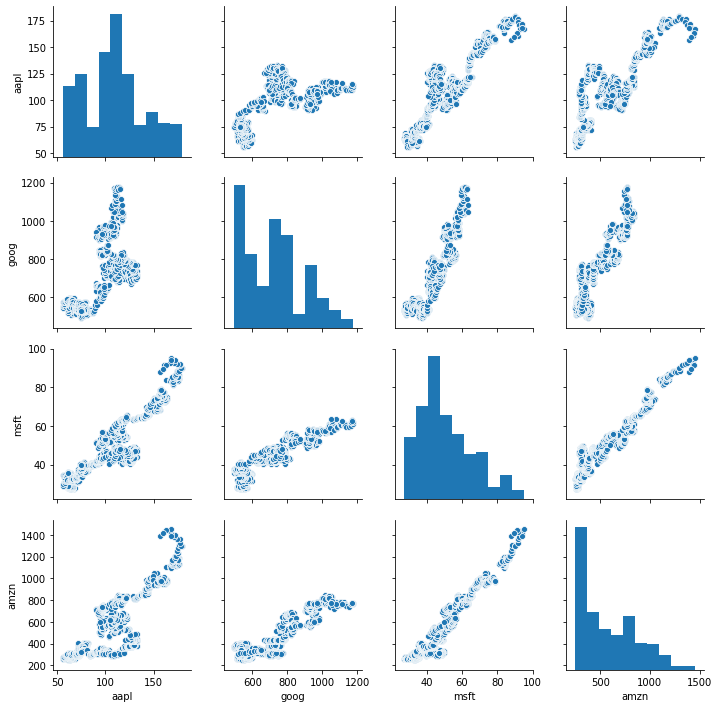

In [268]:
sns.pairplot(data=close)

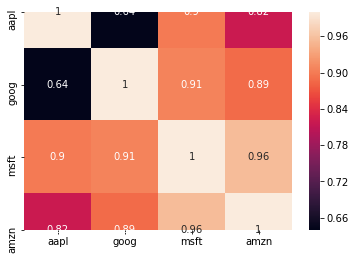

In [269]:
sns.heatmap(close.corr(),annot=True)

# Analyse Daily return of each stock & how they are correlated

In [270]:
data=pd.DataFrame()

In [271]:

data['appl_change']=((a['close']-a['open'])/a['close'])*100
data['googl_change']=((b['close']-b['open'])/b['close'])*100
data['msft_change']=((c['close']-c['open'])/c['close'])*100
data['amzn_change']=((d['close']-d['open'])/d['close'])*100



In [272]:
data.head()

appl_change  googl_change  msft_change  amzn_change
0     0.206325     -1.708269     0.725953     0.209964
1     0.714688     -0.216075     0.753769    -2.328836
2    -2.481344     -1.781065     0.000000    -0.189409
3    -0.042869      1.489879     0.356761     2.946525
4     0.443624      0.334039     0.427960     0.694548

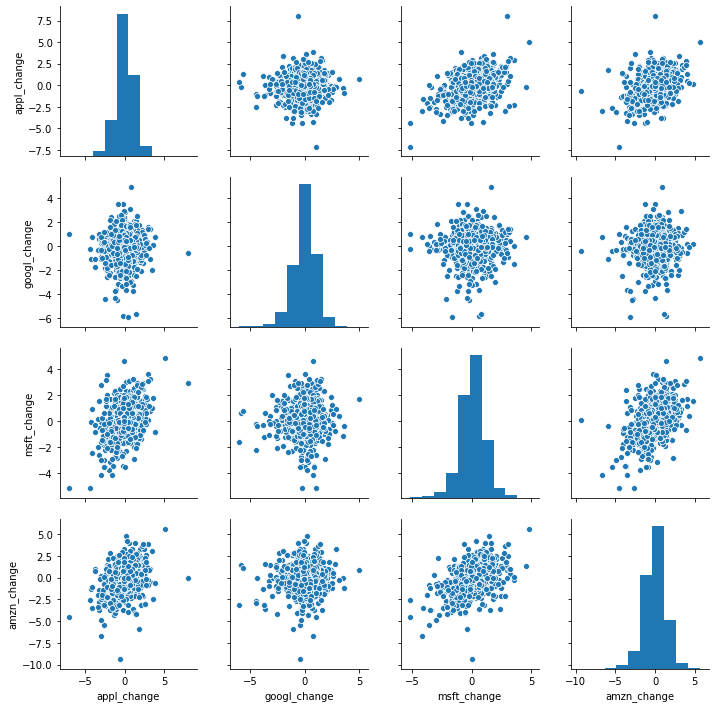

In [273]:
sns.pairplot(data=data)

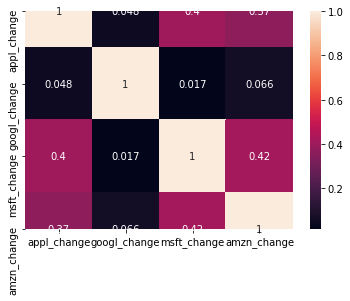

In [274]:
sns.heatmap(data.corr(),annot=True)

# Value at Risk Analysis

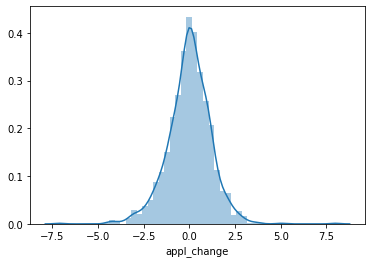

In [275]:
sns.distplot(data['appl_change'])

In [276]:
apple=data['appl_change'].std()
apple

## 68% 0f entire data

1.1871377131421237

In [277]:
apple2=data['appl_change'].std()*2
apple2

## 95% 0f entire data

2.3742754262842474

In [278]:
apple3=data['appl_change'].std()*3
apple3

## 99% 0f entire data

3.561413139426371

In [279]:
appleq1=data['appl_change'].quantile(0.1)
appleq1

-1.4246644227944307

# Analysis of Zomato data

In [280]:
df=pd.read_csv("zomato.csv")

In [281]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [282]:
df.shape

(51717, 17)

In [283]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [284]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
feature_na
    
    

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [285]:
for feature in feature_na:
    print('{} has {} missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 missing values
phone has 2.3358 missing values
location has 0.0406 missing values
rest_type has 0.4389 missing values
dish_liked has 54.2916 missing values
cuisines has 0.087 missing values
approx_cost(for two people) has 0.669 missing values


In [286]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [287]:
df.dropna(axis='index',subset=['rate'],inplace=True)

In [288]:
df.shape

(43942, 17)

In [289]:
def split(x):
    return  x.split('/')[0]
   

In [290]:
df['rate']=df['rate'].apply(split)

In [291]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [292]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)


In [293]:
df['rate'].dtype

dtype('O')

In [294]:
df['rate']=df['rate'].astype(float)

In [295]:
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51709         No   3.7     34    +91 9980121279\n+91 9900240646   
51711         No   2.5     81                      080 65951222   
51712         No   3.6     27                      080 40301477   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51709                  Whitefield   Casual Dining, Bar   
51711                  Whitefield   Casual Dining, Bar   
51712                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

# In depth Analysis of Restaurant

In [296]:
df_rate=df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate.columns=['restaurant','aug_rating']
df_rate

restaurant  aug_rating
0                                     #FeelTheROLL    3.400000
1                                       #L-81 Cafe    3.900000
2                                          #refuel    3.700000
3                                         1000 B.C    3.200000
4             100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    3.700000
...                                            ...         ...
7157                    i-Bar - The Park Bangalore    3.800000
7158                        iFruit Live Ice Creams    3.400000
7159                             iSpice Resto Cafe    3.700000
7160                                       nu.tree    4.314286
7161  re:cess - Hilton Bangalore Embassy GolfLinks    4.100000

[7162 rows x 2 columns]

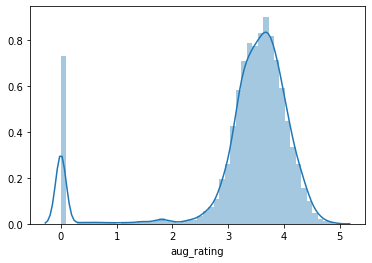

In [297]:
sns.distplot(df_rate['aug_rating'])

Text(0.5, 0, 'Number of outlets')

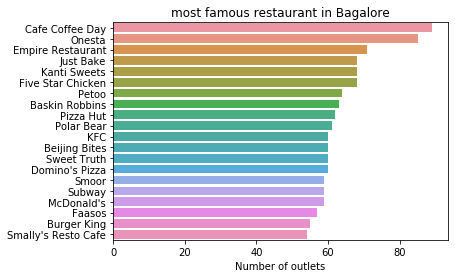

In [298]:
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)
plt.title('most famous restaurant in Bagalore')
plt.xlabel('Number of outlets')


In [299]:
x=df['online_order'].value_counts()
labels=['Accepted','Not accepted']

In [300]:
px.pie(df,values=x,labels=labels,title='Pie chart')

# Restaurant that provide table and restaurant that do not provide table

In [301]:
xx=df['book_table'].value_counts()
lab=['Not book','book']

In [302]:
px.pie(df,values=xx,labels=lab,title='Table bookings')

In [303]:
# Types of restaurant we have

In [304]:
df['rest_type'].isna().sum()

151

In [305]:
df['rest_type'].dropna(inplace=True)

In [306]:
df['rest_type'].isna().sum()

0

In [307]:
len(df['rest_type'].unique())

87

In [308]:
trace1=df['rest_type'].value_counts().nlargest(20).index

# Analysing restaurant prices

In [309]:
x=df['cuisines'].value_counts()[0:15]

In [310]:
x

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Bakery                                  432
Ice Cream, Desserts                     390
Chinese, North Indian                   352
Mithai, Street Food                     332
North Indian, Chinese, Biryani          284
Name: cuisines, dtype: int64

In [311]:
trace1=go.Bar(
x=df['cuisines'].value_counts()[0:15].index,
y=df['cuisines'].value_counts()[0:15]       
)

In [312]:
iplot([trace1])

In [313]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [314]:
df[ 'approx_cost(for two people)'].isna().sum()


252

In [315]:
df.dropna(axis='index',subset= ['approx_cost(for two people)'],inplace=True)

In [316]:
df[ 'approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [317]:
 df[ 'approx_cost(for two people)']= df[ 'approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [318]:
 df[ 'approx_cost(for two people)']= df[ 'approx_cost(for two people)'].astype(int)

In [319]:
 df[ 'approx_cost(for two people)'].dtype

dtype('int32')

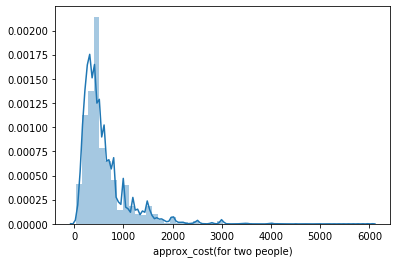

In [320]:
sns.distplot( df[ 'approx_cost(for two people)'])

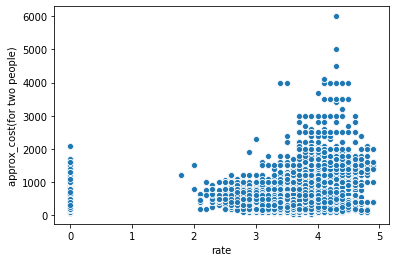

In [321]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',data=df)

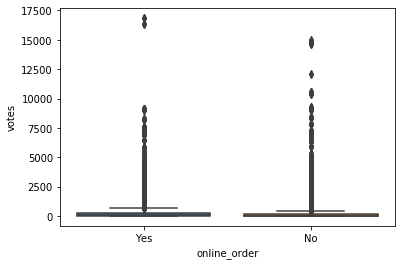

In [322]:
sns.boxplot(x='online_order',y='votes',data=df)

# Most luxurious restaurant of Bungalore

In [323]:
 df[df[ 'approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

# Top 10 most expensive restaurant in Bungalore

In [324]:
data=df.copy()

In [325]:
data.set_index('name',inplace=True)

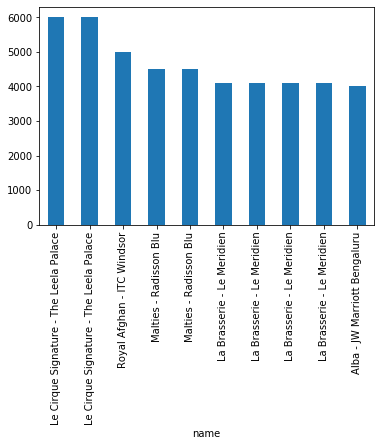

In [326]:
data[ 'approx_cost(for two people)'].nlargest(10).plot.bar()

# Top 10 cheapest restaurant in Bungalore

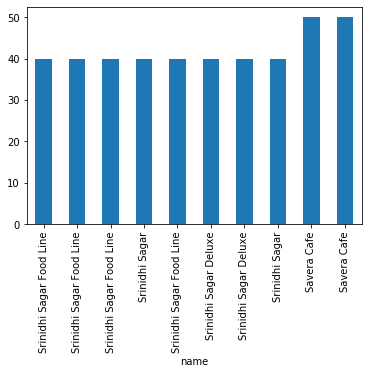

In [327]:
data[ 'approx_cost(for two people)'].nsmallest(10).plot.bar()

# Find all the restaurant that are below the 500 (budget hotel) a well affordable

In [328]:
data[data[ 'approx_cost(for two people)']<500]

url  \
name                                                                               
Addhuri Udupi Bhojana          https://www.zomato.com/bangalore/addhuri-udupi...   
Caf-Eleven                     https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                       https://www.zomato.com/bangalore/t3h-cafe-bana...   
360 Atoms Restaurant And Cafe  https://www.zomato.com/bangalore/360-atoms-res...   
The Vintage Cafe               https://www.zomato.com/bangalore/the-vintage-c...   
...                                                                          ...   
Venice Kerala Restaurant       https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food       https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                     https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay               https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                      https://www.zomato.com/bangalore/raapchick-bro...   

                                                                         address  \
name                                                                               
Addhuri Udupi Bhojana          1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Caf-Eleven                     111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                       504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
360 Atoms Restaurant And Cafe  47, 48 &49, 3Rd Floor, 21st Main Road, 2nd Sta...   
The Vintage Cafe               146, 50 ft Road, 3rd Phase, 3rd Stage, Near Ka...   
...                                                                          ...   
Venice Kerala Restaurant       Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food       7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                       33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay               7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                      Opposite Brookefield Mall, Kundanhalli, Brooke...   

                              online_order book_table  rate  votes  \
name                                                                 
Addhuri Udupi Bhojana                   No         No   3.7     88   
Caf-Eleven                              No         No   4.0    424   
T3H Cafe                                No         No   3.9     93   
360 Atoms Restaurant And Cafe          Yes         No   3.1     13   
The Vintage Cafe                       Yes         No   3.0     62   
...                                    ...        ...   ...    ...   
Venice Kerala Restaurant                No         No   3.7     34   
Thai & Chinese Fast Food                No         No   3.4      7   
The Crunch                              No         No   3.3      6   
Punjabi Charchay                        No         No   3.6     31   
Raapchick                              Yes         No   3.6     49   

                                                          phone      location  \
name                                                                            
Addhuri Udupi Bhojana                            +91 9620009302  Banashankari   
Caf-Eleven                                         080 49577715  Banashankari   
T3H Cafe                                         +91 8884726600  Banashankari   
360 Atoms Restaurant And Cafe                    +91 9880594520  Banashankari   
The Vintage Cafe               +91 9880016665\r\n+91 8217311687  Banashankari   
...                                                         ...           ...   
Venice Kerala Restaurant                         +91 8880059495   Brookefield   
Thai & Chinese Fast Food         +91 9206260085\n+91 7619416923      KR Puram   
The Crunch                                       +91 9016277963   Brookefield   
Punjabi Charchay                 +91 9341341916\n+91 7619416499      KR Puram   
Raapchic

# Performing spatial analysis

In [329]:
df[(df['rate']>4) & (df[ 'approx_cost(for two people)']<=500) ].shape

(2436, 17)

In [330]:
len(df[(df['rate']>4) & (df[ 'approx_cost(for two people)']<=500) ]['name'].unique())

372

In [331]:
df_new=df[(df['rate']>4) & (df[ 'approx_cost(for two people)']<=500) ]


In [332]:
df_new

url  \
10     https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12     https://www.zomato.com/bangalore/the-coffee-sh...   
34     https://www.zomato.com/bangalore/faasos-banash...   
51     https://www.zomato.com/bangalore/shree-cool-po...   
52     https://www.zomato.com/bangalore/corner-house-...   
...                                                  ...   
51312  https://www.zomato.com/bangalore/biryani-kitch...   
51313  https://www.zomato.com/bangalore/stoner-whitef...   
51345  https://www.zomato.com/bangalore/the-wok-shop-...   
51376  https://www.zomato.com/bangalore/nu-tree-1-whi...   
51437  https://www.zomato.com/bangalore/captain-egg-w...   

                                                 address  \
10     12,29 Near PES University Back Gate, D'Souza N...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51     1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52     808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   
...                                                  ...   
51312  FB 11, 1st Floor, Inorbit Mall, EPIP Area, Whi...   
51313  120/57, Ground Floor, Azeem's Gold Building, W...   
51345  S 26, 2nd Floor, Phoenix Market City, Whitefie...   
51376  12th Floor, Gamma Building, Sigma Soft Tech Pa...   
51437  V R Bengaluru Mall, Mahadevapura Main Rd, Whit...   

                                                    name online_order  \
10     CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes   
12                                      The Coffee Shack          Yes   
34                                                Faasos          Yes   
51                                      Shree Cool Point          Yes   
52                                Corner House Ice Cream           No   
...                                                  ...          ...   
51312                                    Biryani Kitchen          Yes   
51313                                             Stoner          Yes   
51345                                       The Wok Shop          Yes   
51376                                            nu.tree          Yes   
51437                                        Captain Egg           No   

      book_table  rate  votes                           phone      location  \
10            No   4.1    402  080 26724489\r\n+91 7406048982  Banashankari   
12           Yes   4.2    164                  +91 9731644212  Banashankari   
34            No   4.2    415                  +91 7700020020  Banashankari   
51            No   4.1     28                  +91 9900617124   Vijay Nagar   
52            No   4.3    345  080 26713965\r\n+91 9845444155  Banashankari   
...          ...   ...    ...                             ...           ...   
51312         No   4.3    634                    080 28029555    Whitefield   
51313         No   4.3    549                    080 49652126    Whitefield   
51345         No   4.2    221                  +91 8067266088    Whitefield   
51376         No   4.2     52                  +91 8310393035    Whitefield   
51437         No   4.1     18  +91 7622934444\n+91 9909000096    Whitefield   

                  rest_type  \
10                     Cafe   
12                     Cafe   
34              Quick Bites   
51              Quick Bites   
52           Dessert Parlor   
...                     ...   
51312            Food Court   
51313  Dessert Parlor, Cafe   
51345           Quick Bites   
51376           Quick Bites   
51437            Food Court   

                                              dish_liked  \
10     Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12     Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                   NaN   
52     Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   
...                                                 

In [333]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [334]:
location_df=pd.DataFrame(zip(location,total))


In [335]:
location_df.columns=['location','restaurant']

In [336]:
def return_budget(location,restaurant):
    budget= df[(df[ 'approx_cost(for two people)']<=400)&(df[ 'location']==location)& (df['rate']>4)& (df['rest_type']==restaurant)]
    return (budget['name'].unique())


In [337]:
 return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [338]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [339]:
! pip install geopy

In [340]:
from geopy.geocoders import Nominatim

In [341]:
geolocator=Nominatim(user_agent='app')

In [342]:
lat_lon=[]
for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [343]:
locations['geo_loc']=lat_lon
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.3872141, 76.6669626)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [344]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.head()

index  location
0                    BTM      4237
1  Koramangala 5th Block      2358
2                    HSR      2113
3            Indiranagar      1892
4               JP Nagar      1849

In [345]:
Rest_locations.columns=['Name','Location']
Rest_locations.head()

Name  Location
0                    BTM      4237
1  Koramangala 5th Block      2358
2                    HSR      2113
3            Indiranagar      1892
4               JP Nagar      1849

In [346]:
Rest_locations=Rest_locations.merge(locations,on='Name',how='left').dropna()
Rest_locations.head()

Name  Location                             geo_loc
0                    BTM      4237  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block      2358             (12.9343774, 77.628415)
2                    HSR      2113                (18.1475, 41.538889)
3            Indiranagar      1892            (12.9732913, 77.6404672)
4               JP Nagar      1849            (12.2655944, 76.6465404)

In [347]:
#np.array(Rest_locations['geo_loc'])

In [348]:
lat,lon=zip(*Rest_locations['geo_loc'])

In [349]:
type(lat)

tuple

In [350]:
Rest_locations['lat']=lat
Rest_locations['lon']=lon

In [351]:
Rest_locations.head()

Name  Location                             geo_loc  \
0                    BTM      4237  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block      2358             (12.9343774, 77.628415)   
2                    HSR      2113                (18.1475, 41.538889)   
3            Indiranagar      1892            (12.9732913, 77.6404672)   
4               JP Nagar      1849            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934377   77.628415  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [352]:
Rest_locations.drop('geo_loc',axis=1,inplace=True)


In [353]:
Rest_locations.head()

Name  Location        lat         lon
0                    BTM      4237  45.954851 -112.496595
1  Koramangala 5th Block      2358  12.934377   77.628415
2                    HSR      2113  18.147500   41.538889
3            Indiranagar      1892  12.973291   77.640467
4               JP Nagar      1849  12.265594   76.646540

In [354]:
! pip install folium

In [355]:
def generatebasemap(default_location=[12,77],default_zoom_start=12):
    basemap=folium.Map(location=default_location,zoom__start=default_zoom_start)
    return basemap


In [356]:
 basemap=generatebasemap()

In [357]:
basemap

In [358]:
df2=df[df['cuisines']=='North Indian']


In [359]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')

In [360]:
north_india.head()

location  url
0                BTM  262
1       Banashankari   35
2          Banaswadi    9
3  Bannerghatta Road   60
4       Basavanagudi   17

In [361]:
north_india.columns=['Name','count']

In [362]:
north_india

Name  count
0                             BTM    262
1                    Banashankari     35
2                       Banaswadi      9
3               Bannerghatta Road     60
4                    Basavanagudi     17
..                            ...    ...
58  Varthur Main Road, Whitefield      3
59                  Vasanth Nagar     12
60                     Whitefield    146
61                  Wilson Garden     37
62                    Yeshwantpur      3

[63 rows x 2 columns]

In [363]:
north_india=north_india.merge(locations,on='Name',how='left').dropna()

In [364]:
north_india['lat'],north_india['lon']=zip(*north_india['geo_loc'].values)

In [365]:
north_india.drop('geo_loc',axis=1,inplace=True)

In [366]:
north_india

Name  count        lat         lon
0                             BTM    262  45.954851 -112.496595
1                    Banashankari     35  15.887678   75.704678
2                       Banaswadi      9  13.014162   77.651854
3               Bannerghatta Road     60  12.887979   77.597081
4                    Basavanagudi     17  12.941726   77.575502
..                            ...    ...        ...         ...
58  Varthur Main Road, Whitefield      3  12.941466   77.747094
59                  Vasanth Nagar     12  12.988721   77.585169
60                     Whitefield    146  44.373058  -71.611858
61                  Wilson Garden     37  12.948934   77.596827
62                    Yeshwantpur      3  13.023830   77.552921

[63 rows x 4 columns]

In [367]:
basemap=generatebasemap()
HeatMap(north_india[['lat','lon','count']].values.tolist(),zoom=20,
radius=15).add_to(basemap)

In [368]:
basemap

In [369]:
df_1=df.groupby(['rest_type','name']).agg('count')

In [370]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x:x.sort_values(by='url',ascending=False)                                                             )

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      @North Parontha Hut                1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [371]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x:x.sort_values(by='url',ascending=False)   ['url']                                                          )

    rest_type           name                      
0   Bakery              Just Bake                     44
                        Warm Oven                     28
                        INDULGE by InnerChef          28
                        Karachi Bakery                26
                        CakeZone                      21
                                                      ..
86  Takeaway, Delivery  Agraharam Meal                 1
                        Adyar Ananda Bhavan Sweets     1
                        Faasos                         1
                        @North Parontha Hut            1
                        Lucky Singh & Co               1
Name: url, Length: 7712, dtype: int64

# Sales Data Analysis Project

In [372]:
os.listdir('C:\\Users\\Admin\\Documents\\PYTHON\\Sales_Data')

[' all_Data.csv',
 'Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [373]:
files=[file for file in os.listdir('C:\\Users\\Admin\\Documents\\PYTHON\\Sales_Data')]
for file in files:
    print(file)

 all_Data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [374]:
path='C:\\Users\\Admin\\Documents\\PYTHON\\sales_Data'
all_data=pd.DataFrame()

for file in files:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])
all_data.shape

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (2,3,6,8) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




(932450, 10)

In [375]:
all_data.to_csv('C:\\Users\\Admin\\Documents\\PYTHON\\sales_Data\\ all_data.csv',index=False)

# Analyzing Monthly sales

In [376]:
all_data.head()

Hour      Order Date Order ID Price Each                     Product  \
0   8.0  04/19/19 08:46   176558      11.95        USB-C Charging Cable   
1  22.0  04/07/19 22:30   176559      99.99  Bose SoundSport Headphones   
2  14.0  04/12/19 14:38   176560        600                Google Phone   
3  14.0  04/12/19 14:38   176560      11.99            Wired Headphones   
4   9.0  04/30/19 09:27   176561      11.99            Wired Headphones   

                       Purchase Address Quantity Ordered   Sales  \
0          917 1st St, Dallas, TX 75001                2   23.90   
1     682 Chestnut St, Boston, MA 02215                1   99.99   
2  669 Spruce St, Los Angeles, CA 90001                1  600.00   
3  669 Spruce St, Los Angeles, CA 90001                1   11.99   
4     333 8th St, Los Angeles, CA 90001                1   11.99   

           city  month  
0        Dallas    4.0  
1        Boston    4.0  
2   Los Angeles    4.0  
3   Los Angeles    4.0  
4   Los Angeles    4.0

In [377]:
all_data.isnull().sum()

Hour                560550
Order Date            1635
Order ID              1635
Price Each            1635
Product               1635
Purchase Address      1635
Quantity Ordered      1635
Sales               560550
city                560550
month               560550
dtype: int64

In [378]:
all_data.shape

(932450, 10)

In [379]:
all_data.dropna(how='all',inplace=True)

In [380]:
'04/19/19 08:46'.split('/')[0]

'04'

In [381]:
def month(x):
    return x.split('/')[0]

In [382]:
all_data['month']=all_data['Order Date'].apply(month)

In [383]:
all_data.head()

Hour      Order Date Order ID Price Each                     Product  \
0   8.0  04/19/19 08:46   176558      11.95        USB-C Charging Cable   
1  22.0  04/07/19 22:30   176559      99.99  Bose SoundSport Headphones   
2  14.0  04/12/19 14:38   176560        600                Google Phone   
3  14.0  04/12/19 14:38   176560      11.99            Wired Headphones   
4   9.0  04/30/19 09:27   176561      11.99            Wired Headphones   

                       Purchase Address Quantity Ordered   Sales  \
0          917 1st St, Dallas, TX 75001                2   23.90   
1     682 Chestnut St, Boston, MA 02215                1   99.99   
2  669 Spruce St, Los Angeles, CA 90001                1  600.00   
3  669 Spruce St, Los Angeles, CA 90001                1   11.99   
4     333 8th St, Los Angeles, CA 90001                1   11.99   

           city month  
0        Dallas    04  
1        Boston    04  
2   Los Angeles    04  
3   Los Angeles    04  
4   Los Angeles    04

In [384]:
all_data['month']=all_data['month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [ ]:
all_data['month'].unique()

In [ ]:
filter=all_data['month']=='Order Date'
all_data=all_data[-filter]

In [ ]:
all_data.dtypes

In [ ]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)

In [ ]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [ ]:
all_data

In [ ]:
all_data.groupby('month')['Sales'].sum()

In [ ]:
month=['Jan','Feb','Mar','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.bar(month,all_data.groupby('month')['Sales'].sum())
plt.xticks(month)
plt.xlabel('month')
plt.ylabel('Sales')

# Analyzing Maximum Order and Hour Analysis

In [ ]:
all_data.head()

In [ ]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

In [ ]:
def city(x):
    return x.split(',')[1]

In [ ]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [ ]:
all_data.head()

In [ ]:
all_data.groupby('city')['city'].count().plot.bar()

In [ ]:
all_data['Order Date'].dtype

In [ ]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

In [ ]:
all_data.head()

In [ ]:
keys=[]
hour=[]
for key, hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))
    


In [ ]:
plt.plot(keys,hour)
plt.grid()

# Analysing most popular products

In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [ ]:
all_data.groupby('Product')['Price Each'].mean().plot.bar()

In [ ]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()


In [ ]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,prices)
ax1.set_xticklabels(products,rotation='vertical',size=8)

# What products are most often sold together

In [ ]:
df=all_data['Order ID'].duplicated(keep=False)
df2=all_data[df]
df2.head()

In [ ]:
df2['grouped']=df2.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [ ]:
df2.head()

In [ ]:
df2=df2.drop_duplicates(subset=['Order ID'])

In [ ]:
df2

In [ ]:
df2['grouped'].value_counts()[0:5].plot.pie()

# Indian Premier League (Most attended cricket league in the world and ranked as 2019 second by average attendance among all sports leagues)

In [411]:
df=pd.read_csv('C:\\Users\\Admin\\Documents\\PYTHON\\Udemy\\IPL\\deliveries.csv')
df


match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150455       636       2  Royal Challengers Bangalore   
150456       636       2  Royal Challengers Bangalore   
150457       636       2  Royal Challengers Bangalore   
150458       636       2  Royal Challengers Bangalore   
150459       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     1     3      DA Warner       S Dhawan   
3       Royal Challengers Bangalore     1     4      DA Warner       S Dhawan   
4       Royal Challengers Bangalore     1     5      DA Warner       S Dhawan   
...                             ...   ...   ...            ...            ...   
150455          Sunrisers Hyderabad    20     2    Sachin Baby      CJ Jordan   
150456          Sunrisers Hyderabad    20     3    Sachin Baby      CJ Jordan   
150457          Sunrisers Hyderabad    20     4  Iqbal Abdulla    Sachin Baby   
150458          Sunrisers Hyderabad    20     5    Sachin Baby  Iqbal Abdulla   
150459          Sunrisers Hyderabad    20     6  Iqbal Abdulla    Sachin Baby   

          bowler  is_super_over  ...  bye_runs  legbye_runs  noball_runs  \
0       TS Mills              0  ...         0            0            0   
1       TS Mills              0  ...         0            0            0   
2       TS Mills              0  ...         0            0            0   
3       TS Mills              0  ...         0            0            0   
4       TS Mills              0  ...         0            0            0   
...          ...            ...  ...       ...          ...          ...   
150455   B Kumar              0  ...         0            0            0   
150456   B Kumar              0  ...         0            0            0   
150457   B Kumar              0  ...         0            1            0   
150458   B Kumar              0  ...         0            0            0   
150459   B Kumar              0  ...         0            0            0   

        penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0                  0             0           0           0               NaN   
1                  0             0           0           0               NaN   
2                  0             4           0           4               NaN   
3                  0             0           0           0               NaN   
4                  0             0           2           2               NaN   
...              ...           ...         ...         ...               ...   
150455             0             2           0           2               NaN   
150456             0             0           0           0         CJ Jordan   
150457             0             0           1           1               NaN   
150458             0             1           0           1               NaN   
150459             0             4           0           4               NaN   

       dismissal_kind  fielder  
0                 NaN      NaN  
1                 NaN      NaN  
2                 NaN      NaN  
3                 NaN      NaN  
4                 NaN      NaN  
...               ...      ...  
150455            NaN      NaN  
150456        run out  NV Ojha  
150457            NaN      NaN  
150458            NaN      NaN  
150459            NaN      NaN  

[150460 rows x 21 columns]

In [407]:
# df=pd.read_csv('C:\\Users\\Admin\\Documents\\PYTHON\\Udemy\\IPL\\matches.csv')
# df.head()

In [415]:
filt=df['batsman']=="DA Warner"
df_warner=df[filt]
df_warner.shape

(2902, 21)

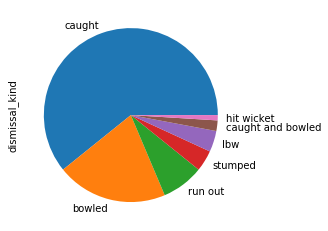

In [416]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [417]:
len(df_warner[df_warner['batsman_runs']==4])

401

In [418]:
len(df_warner[df_warner['batsman_runs']==6])

160

In [419]:
def count (df,runs):
    return len(df_warner[df_warner['batsman_runs']==runs])*runs
    

In [420]:
count (df_warner,2)

414

([<matplotlib.patches.Wedge at 0x1ed90318f48>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.1128316125234867, -0.44900534759440974, '4'),
  Text(0.8038429148449225, -0.750890516822272, '5')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0'),
  Text(-0.6491517739720338, -0.261919786096739, '40.0'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9')])

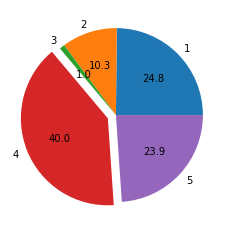

In [421]:
slices=[997,414,39,1604,960]
labels=[1,2,3,4,5]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f',explode=explode)

# Performing Analysis on Batsman-Performance

In [422]:
df.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [423]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [424]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRM',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GI', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DO', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTC', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [425]:
Teams

{'Royal Challengers Bangalore': 'RCB',
 'Sunrisers Hyderabad': 'SRM',
 'Rising Pune Supergiant': 'RPS',
 'Mumbai Indians': 'MI',
 'Kolkata Knight Riders': 'KKR',
 'Gujarat Lions': 'GI',
 'Kings XI Punjab': 'KXIP',
 'Delhi Daredevils': 'DO',
 'Chennai Super Kings': 'CSK',
 'Rajasthan Royals': 'RR',
 'Deccan Chargers': 'DC',
 'Kochi Tuskers Kerala': 'KTC',
 'Pune Warriors': 'PW',
 'Rising Pune Supergiants': 'RPS'}

In [426]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [427]:
df.head()

match_id  inning batting_team bowling_team  over  ball    batsman  \
0         1       1          SRM          RCB     1     1  DA Warner   
1         1       1          SRM          RCB     1     2  DA Warner   
2         1       1          SRM          RCB     1     3  DA Warner   
3         1       1          SRM          RCB     1     4  DA Warner   
4         1       1          SRM          RCB     1     5  DA Warner   

  non_striker    bowler  is_super_over  ...  bye_runs  legbye_runs  \
0    S Dhawan  TS Mills              0  ...         0            0   
1    S Dhawan  TS Mills              0  ...         0            0   
2    S Dhawan  TS Mills              0  ...         0            0   
3    S Dhawan  TS Mills              0  ...         0            0   
4    S Dhawan  TS Mills              0  ...         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   
1            0             0             0           0           0   
2            0             0             4           0           4   
3            0             0             0           0           0   
4            0             0             0           2           2   

   player_dismissed dismissal_kind fielder  
0               NaN            NaN     NaN  
1               NaN            NaN     NaN  
2               NaN            NaN     NaN  
3               NaN            NaN     NaN  
4               NaN            NaN     NaN  

[5 rows x 21 columns]

In [428]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [429]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

inning batting_team  total_runs
0          1          SRM         207
1          2          RCB         172
2          1           MI         184
3          2          RPS         187
4          1           GI         183
...      ...          ...         ...
1279       2          KKR         140
1280       1           GI         162
1281       2          SRM         163
1282       1          SRM         208
1283       2          RCB         200

[1284 rows x 3 columns]

In [430]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]
inning1

inning batting_team  total_runs
0          1          SRM         207
2          1           MI         184
4          1           GI         183
6          1          RPS         163
8          1          RCB         157
...      ...          ...         ...
1274       1           DO         138
1276       1           GI         158
1278       1          SRM         162
1280       1           GI         162
1282       1          SRM         208

[636 rows x 3 columns]

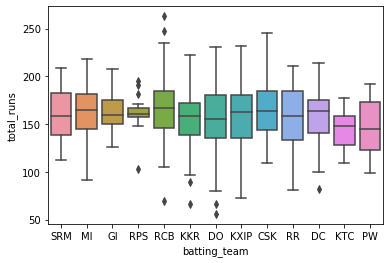

In [431]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

In [432]:
high_scores=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [433]:
score_200=high_scores[high_scores['total_runs']>=200]

In [434]:
score_200

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRM          RCB         207
16           9       1           DO          RPS         205
38          20       1          RCB           GI         213
62          32       1          SRM         KXIP         207
72          36       1          SRM          KKR         209
...        ...     ...          ...          ...         ...
1250       620       1          RCB           GI         248
1256       623       1           MI           DO         206
1262       626       1          RCB         KXIP         211
1282       636       1          SRM          RCB         208
1283       636       2          RCB          SRM         200

[67 rows x 5 columns]

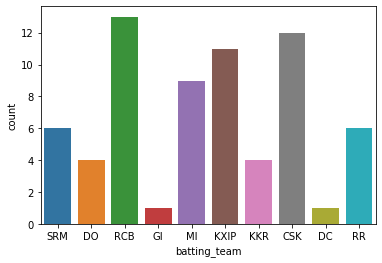

In [435]:
sns.countplot(score_200['batting_team'])

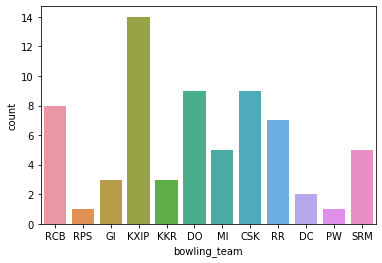

In [436]:
sns.countplot(score_200['bowling_team'])

# Performance Batsman comparison

In [456]:
balls=df.groupby('batsman')['ball'].count().reset_index()

In [440]:
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()


batsman  batsman_runs
0    A Ashish Reddy           280
1        A Chandila             4
2          A Chopra            53
3       A Choudhary            25
4        A Flintoff            62
..              ...           ...
456     YV Takawale           192
457   Yashpal Singh            47
458     Younis Khan             3
459    Yuvraj Singh          2591
460          Z Khan           117

[461 rows x 2 columns]

In [441]:
four=df[df['batsman_runs']==4]
four

match_id  inning batting_team bowling_team  over  ball        batsman  \
2              1       1          SRM          RCB     1     3      DA Warner   
8              1       1          SRM          RCB     2     2      DA Warner   
13             1       1          SRM          RCB     2     7   MC Henriques   
30             1       1          SRM          RCB     5     5   MC Henriques   
32             1       1          SRM          RCB     6     1       S Dhawan   
...          ...     ...          ...          ...   ...   ...            ...   
150403       636       2          RCB          SRM    11     4        V Kohli   
150407       636       2          RCB          SRM    12     2        V Kohli   
150418       636       2          RCB          SRM    14     1       KL Rahul   
150447       636       2          RCB          SRM    18     6    Sachin Baby   
150459       636       2          RCB          SRM    20     6  Iqbal Abdulla   

           non_striker        bowler  is_super_over  ...  bye_runs  \
2             S Dhawan      TS Mills              0  ...         0   
8             S Dhawan   A Choudhary              0  ...         0   
13            S Dhawan   A Choudhary              0  ...         0   
30            S Dhawan     S Aravind              0  ...         0   
32        MC Henriques     SR Watson              0  ...         0   
...                ...           ...            ...  ...       ...   
150403  AB de Villiers   BCJ Cutting              0  ...         0   
150407  AB de Villiers  Bipul Sharma              0  ...         0   
150418  AB de Villiers  Bipul Sharma              0  ...         0   
150447       STR Binny       B Kumar              0  ...         0   
150459     Sachin Baby       B Kumar              0  ...         0   

        legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
2                 0            0             0             4           0   
8                 0            0             0             4           0   
13                0            0             0             4           0   
30                0            0             0             4           0   
32                0            0             0             4           0   
...             ...          ...           ...           ...         ...   
150403            0            0             0             4           0   
150407            0            0             0             4           0   
150418            0            0             0             4           0   
150447            0            0             0             4           0   
150459            0            0             0             4           0   

        total_runs  player_dismissed dismissal_kind fielder  
2                4               NaN            NaN     NaN  
8                4               NaN            NaN     NaN  
13               4               NaN            NaN     NaN  
30               4               NaN            NaN     NaN  
32               4               NaN            NaN     NaN  
...            ...               ...            ...     ...  
150403           4               NaN            NaN     NaN  
150407           4               NaN            NaN     NaN  
150418           4               NaN            NaN     NaN  
150447           4               NaN            NaN     NaN  
150459           4               NaN            NaN     NaN  

[17033 rows x 21 columns]

In [450]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

batsman   4s
0    A Ashish Reddy   16
1          A Chopra    7
2       A Choudhary    1
3        A Flintoff    5
4          A Kumble    3
..              ...  ...
363       YK Pathan  240
364     YV Takawale   26
365   Yashpal Singh    5
366    Yuvraj Singh  205
367          Z Khan   11

[368 rows x 2 columns]

In [453]:
six=df[df['batsman_runs']==6]
six=four.groupby('batsman')['batsman_runs'].count().reset_index()
six.columns=['batsman','6s']
six

batsman   6s
0    A Ashish Reddy   16
1          A Chopra    7
2       A Choudhary    1
3        A Flintoff    5
4          A Kumble    3
..              ...  ...
363       YK Pathan  240
364     YV Takawale   26
365   Yashpal Singh    5
366    Yuvraj Singh  205
367          Z Khan   11

[368 rows x 2 columns]

In [459]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],six.iloc[:,1]],axis=1)
player

batsman  batsman_runs  ball    4s    6s
0    A Ashish Reddy           280   196  16.0  16.0
1        A Chandila             4     7   7.0   7.0
2          A Chopra            53    75   1.0   1.0
3       A Choudhary            25    20   5.0   5.0
4        A Flintoff            62    57   3.0   3.0
..              ...           ...   ...   ...   ...
456     YV Takawale           192   183   NaN   NaN
457   Yashpal Singh            47    67   NaN   NaN
458     Younis Khan             3     7   NaN   NaN
459    Yuvraj Singh          2591  2050   NaN   NaN
460          Z Khan           117   141   NaN   NaN

[461 rows x 5 columns]

In [463]:
player.fillna(0,inplace=True)

In [464]:
player

batsman  batsman_runs  ball    4s    6s
0    A Ashish Reddy           280   196  16.0  16.0
1        A Chandila             4     7   7.0   7.0
2          A Chopra            53    75   1.0   1.0
3       A Choudhary            25    20   5.0   5.0
4        A Flintoff            62    57   3.0   3.0
..              ...           ...   ...   ...   ...
456     YV Takawale           192   183   0.0   0.0
457   Yashpal Singh            47    67   0.0   0.0
458     Younis Khan             3     7   0.0   0.0
459    Yuvraj Singh          2591  2050   0.0   0.0
460          Z Khan           117   141   0.0   0.0

[461 rows x 5 columns]

In [465]:
player['strike_rate']=(player['batsman_runs']/player['ball'])*100

In [466]:
player

batsman  batsman_runs  ball    4s    6s  strike_rate
0    A Ashish Reddy           280   196  16.0  16.0   142.857143
1        A Chandila             4     7   7.0   7.0    57.142857
2          A Chopra            53    75   1.0   1.0    70.666667
3       A Choudhary            25    20   5.0   5.0   125.000000
4        A Flintoff            62    57   3.0   3.0   108.771930
..              ...           ...   ...   ...   ...          ...
456     YV Takawale           192   183   0.0   0.0   104.918033
457   Yashpal Singh            47    67   0.0   0.0    70.149254
458     Younis Khan             3     7   0.0   0.0    42.857143
459    Yuvraj Singh          2591  2050   0.0   0.0   126.390244
460          Z Khan           117   141   0.0   0.0    82.978723

[461 rows x 6 columns]

In [467]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

match_id       batsman batting_team  batsman_runs
0            1   A Choudhary          RCB             6
1            1   BCJ Cutting          SRM            16
2            1      CH Gayle          RCB            32
3            1     DA Warner          SRM            14
4            1      DJ Hooda          SRM            16
...        ...           ...          ...           ...
9510       636     SR Watson          RCB            11
9511       636     STR Binny          RCB             9
9512       636   Sachin Baby          RCB            18
9513       636       V Kohli          RCB            54
9514       636  Yuvraj Singh          SRM            38

[9515 rows x 4 columns]

In [479]:
max=grp.groupby('batsman')['batsman_runs'].max().reset_index()
max.columns=['batsman','max_runs']
max

batsman  max_runs
0    A Ashish Reddy        36
1        A Chandila         4
2          A Chopra        24
3       A Choudhary        15
4        A Flintoff        24
..              ...       ...
456     YV Takawale        45
457   Yashpal Singh        20
458     Younis Khan         3
459    Yuvraj Singh        83
460          Z Khan        23

[461 rows x 2 columns]

In [480]:
player2=pd.concat([player,max.iloc[:,1]],axis=1)
player2

batsman  batsman_runs  ball    4s    6s  strike_rate  max_runs
0    A Ashish Reddy           280   196  16.0  16.0   142.857143        36
1        A Chandila             4     7   7.0   7.0    57.142857         4
2          A Chopra            53    75   1.0   1.0    70.666667        24
3       A Choudhary            25    20   5.0   5.0   125.000000        15
4        A Flintoff            62    57   3.0   3.0   108.771930        24
..              ...           ...   ...   ...   ...          ...       ...
456     YV Takawale           192   183   0.0   0.0   104.918033        45
457   Yashpal Singh            47    67   0.0   0.0    70.149254        20
458     Younis Khan             3     7   0.0   0.0    42.857143         3
459    Yuvraj Singh          2591  2050   0.0   0.0   126.390244        83
460          Z Khan           117   141   0.0   0.0    82.978723        23

[461 rows x 7 columns]

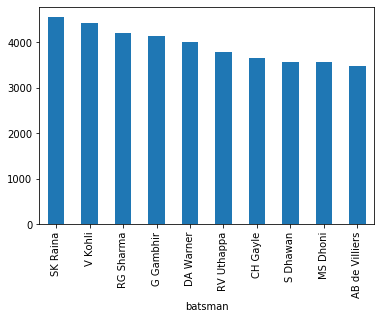

In [482]:
max_runs=df.groupby('batsman')['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[0:10].plot.bar()

In [484]:
df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

match_id         batsman batting_team  batsman_runs
6200       411        CH Gayle          RCB           175
900         60     BB McCullum          KKR           158
8426       562  AB de Villiers          RCB           133
9257       620  AB de Villiers          RCB           129
5585       372        CH Gayle          RCB           128
3135       206         M Vijay          CSK           127
529         36       DA Warner          SRM           126
7752       516        V Sehwag         KXIP           122
3686       243     PC Valthaty         KXIP           120
4223       279        V Sehwag           DO           119

In [485]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [486]:
dismissal_kind=['nan', 'caught', 'bowled',  'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [489]:
hwt=df[df['dismissal_kind'].isin(dismissal_kind)]
hwt.head()

match_id  inning batting_team bowling_team  over  ball        batsman  \
11          1       1          SRM          RCB     2     5      DA Warner   
64          1       1          SRM          RCB    11     3       S Dhawan   
94          1       1          SRM          RCB    16     2   MC Henriques   
116         1       1          SRM          RCB    19     4   Yuvraj Singh   
160         1       2          RCB          SRM     6     4  Mandeep Singh   

      non_striker       bowler  is_super_over  ...  bye_runs  legbye_runs  \
11       S Dhawan  A Choudhary              0  ...         0            0   
64   MC Henriques    STR Binny              0  ...         0            0   
94   Yuvraj Singh    YS Chahal              0  ...         0            0   
116      DJ Hooda     TS Mills              0  ...         0            0   
160      CH Gayle  Rashid Khan              0  ...         0            0   

     noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
11             0             0             0           0           0   
64             0             0             0           0           0   
94             0             0             0           0           0   
116            0             0             0           0           0   
160            0             0             0           0           0   

     player_dismissed dismissal_kind        fielder  
11          DA Warner         caught  Mandeep Singh  
64           S Dhawan         caught    Sachin Baby  
94       MC Henriques         caught    Sachin Baby  
116      Yuvraj Singh         bowled            NaN  
160     Mandeep Singh         bowled            NaN  

[5 rows x 21 columns]

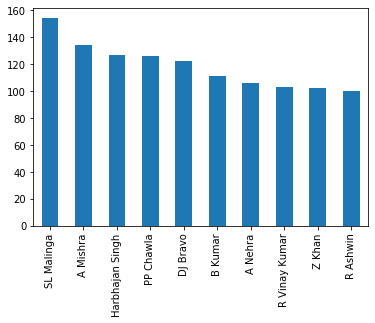

In [491]:
hwt['bowler'].value_counts()[0:10].plot(kind='bar')

In [7]:
df=pd.read_csv('C:\\Users\\Admin\\Documents\\PYTHON\\Udemy\\IPL\\matches.csv')
df

id  season       city       date                        team1  \
0      1    2017  Hyderabad   4/5/2017          Sunrisers Hyderabad   
1      2    2017       Pune   4/6/2017               Mumbai Indians   
2      3    2017     Rajkot   4/7/2017                Gujarat Lions   
3      4    2017     Indore   4/8/2017       Rising Pune Supergiant   
4      5    2017  Bangalore   4/8/2017  Royal Challengers Bangalore   
..   ...     ...        ...        ...                          ...   
631  632    2016     Raipur  5/22/2016             Delhi Daredevils   
632  633    2016  Bangalore  5/24/2016                Gujarat Lions   
633  634    2016      Delhi  5/25/2016          Sunrisers Hyderabad   
634  635    2016      Delhi  5/27/2016                Gujarat Lions   
635  636    2016  Bangalore  5/29/2016          Sunrisers Hyderabad   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight Riders         field   
3                Kings XI Punjab              Kings XI Punjab         field   
4               Delhi Daredevils  Royal Challengers Bangalore           bat   
..                           ...                          ...           ...   
631  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
632  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
633        Kolkata Knight Riders        Kolkata Knight Riders         field   
634          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
635  Royal Challengers Bangalore          Sunrisers Hyderabad           bat   

     result  dl_applied                       winner  win_by_runs  \
0    normal           0          Sunrisers Hyderabad           35   
1    normal           0       Rising Pune Supergiant            0   
2    normal           0        Kolkata Knight Riders            0   
3    normal           0              Kings XI Punjab            0   
4    normal           0  Royal Challengers Bangalore           15   
..      ...         ...                          ...          ...   
631  normal           0  Royal Challengers Bangalore            0   
632  normal           0  Royal Challengers Bangalore            0   
633  normal           0          Sunrisers Hyderabad           22   
634  normal           0          Sunrisers Hyderabad            0   
635  normal           0          Sunrisers Hyderabad            8   

     win_by_wickets player_of_match  \
0                 0    Yuvraj Singh   
1                 7       SPD Smith   
2                10         CA Lynn   
3                 6      GJ Maxwell   
4                 0       KM Jadhav   
..              ...             ...   
631               6         V Kohli   
632               4  AB de Villiers   
633               0    MC Henriques   
634               4       DA Warner   
635               0     BCJ Cutting   

                                                venue          umpire1  \
0           Rajiv Gandhi International Stadium, Uppal      AY Dandekar   
1             Maharashtra Cricket Association Stadium   A Nand Kishore   
2              Saurashtra Cricket Association Stadium      Nitin Menon   
3                              Holkar Cricket Stadium     AK Chaudhary   
4                               M Chinnaswamy Stadium              NaN   
..                                                ...              ...   
631  Shaheed Veer Narayan Singh International Stadium   A Nand Kishore   
632                             M Chinnaswamy Stadium     AK Chaudhary   
633                                  Feroz Shah Kotla        M Erasmus   
634                                  Feroz Shah Kotla        M Erasmus   
635                             M Chinnaswamy Stadium  HDPK Dharmasena   

             umpi

In [8]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [2]:
#m='C:\\Users\\Admin\\Downloads\\kach.nc'

In [5]:
#ds=nc.Dataset(m)
#ds

In [9]:
df.drop(['umpire3'],axis=1,inplace=True)

In [10]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRM',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GI', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DO', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTC', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [12]:
df['team1']=df['team1'].map(Teams)
df['team2']=df['team2'].map(Teams)
df.head()

id  season       city      date team1 team2                  toss_winner  \
0   1    2017  Hyderabad  4/5/2017   SRM   RCB  Royal Challengers Bangalore   
1   2    2017       Pune  4/6/2017    MI   RPS       Rising Pune Supergiant   
2   3    2017     Rajkot  4/7/2017    GI   KKR        Kolkata Knight Riders   
3   4    2017     Indore  4/8/2017   RPS  KXIP              Kings XI Punjab   
4   5    2017  Bangalore  4/8/2017   RCB    DO  Royal Challengers Bangalore   

  toss_decision  result  dl_applied                       winner  win_by_runs  \
0         field  normal           0          Sunrisers Hyderabad           35   
1         field  normal           0       Rising Pune Supergiant            0   
2         field  normal           0        Kolkata Knight Riders            0   
3         field  normal           0              Kings XI Punjab            0   
4           bat  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  
0     AY Dandekar       NJ Llong  
1  A Nand Kishore         S Ravi  
2     Nitin Menon      CK Nandan  
3    AK Chaudhary  C Shamshuddin  
4             NaN            NaN

In [13]:
df.shape[0]

636

In [14]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan],
      dtype=object)

In [16]:
df['team1'].unique()

array(['SRM', 'MI', 'GI', 'RPS', 'RCB', 'KKR', 'DO', 'KXIP', 'CSK', 'RR',
       'DC', 'KTC', 'PW'], dtype=object)

In [18]:
df['player_of_match'].value_counts()

CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
                  ..
MA Agarwal         1
KS Williamson      1
RP Singh           1
DP Nannes          1
MS Gony            1
Name: player_of_match, Length: 201, dtype: int64

In [20]:
filter=df['win_by_runs'].max()
df[df['win_by_runs']==filter]

id  season   city      date team1 team2       toss_winner toss_decision  \
43  44    2017  Delhi  5/6/2017    MI    DO  Delhi Daredevils         field   

    result  dl_applied          winner  win_by_runs  win_by_wickets  \
43  normal           0  Mumbai Indians          146               0   

   player_of_match             venue      umpire1    umpire2  
43     LMP Simmons  Feroz Shah Kotla  Nitin Menon  CK Nandan

# Toss decision in each seasons

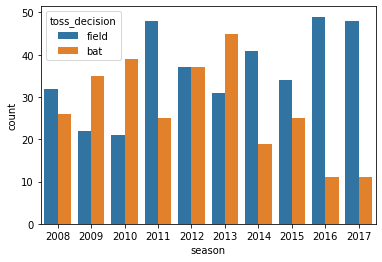

In [21]:
sns.countplot(x='season',hue='toss_decision',data=df)

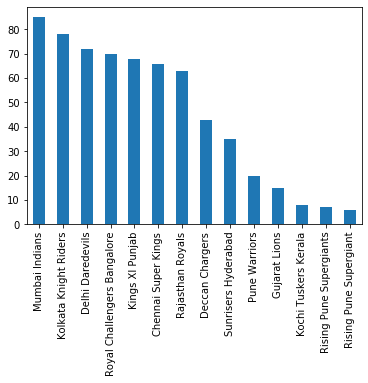

In [22]:
df['toss_winner'].value_counts().plot(kind='bar')

In [28]:
teams=(df['team1'].value_counts()+df['team2'].value_counts()).reset_index()
teams.columns=['team_name','matches_played']
teams

team_name  matches_played
0        CSK             131
1         DC              75
2         DO             147
3         GI              30
4        KKR             148
5        KTC              14
6       KXIP             148
7         MI             157
8         PW              46
9        RCB             152
10       RPS              30
11        RR             118
12       SRM              76

In [30]:
df['winner'].value_counts().reset_index()

index  winner
0                Mumbai Indians      92
1           Chennai Super Kings      79
2         Kolkata Knight Riders      77
3   Royal Challengers Bangalore      73
4               Kings XI Punjab      70
5              Rajasthan Royals      63
6              Delhi Daredevils      62
7           Sunrisers Hyderabad      42
8               Deccan Chargers      29
9                 Gujarat Lions      13
10                Pune Warriors      12
11       Rising Pune Supergiant      10
12         Kochi Tuskers Kerala       6
13      Rising Pune Supergiants       5

In [32]:
df2=pd.read_csv('C:\\Users\\Admin\\Documents\\PYTHON\\Udemy\\IPL\\deliveries.csv')
df2


match_id  inning                 batting_team  \
0              1       1          Sunrisers Hyderabad   
1              1       1          Sunrisers Hyderabad   
2              1       1          Sunrisers Hyderabad   
3              1       1          Sunrisers Hyderabad   
4              1       1          Sunrisers Hyderabad   
...          ...     ...                          ...   
150455       636       2  Royal Challengers Bangalore   
150456       636       2  Royal Challengers Bangalore   
150457       636       2  Royal Challengers Bangalore   
150458       636       2  Royal Challengers Bangalore   
150459       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     1     3      DA Warner       S Dhawan   
3       Royal Challengers Bangalore     1     4      DA Warner       S Dhawan   
4       Royal Challengers Bangalore     1     5      DA Warner       S Dhawan   
...                             ...   ...   ...            ...            ...   
150455          Sunrisers Hyderabad    20     2    Sachin Baby      CJ Jordan   
150456          Sunrisers Hyderabad    20     3    Sachin Baby      CJ Jordan   
150457          Sunrisers Hyderabad    20     4  Iqbal Abdulla    Sachin Baby   
150458          Sunrisers Hyderabad    20     5    Sachin Baby  Iqbal Abdulla   
150459          Sunrisers Hyderabad    20     6  Iqbal Abdulla    Sachin Baby   

          bowler  is_super_over  ...  bye_runs  legbye_runs  noball_runs  \
0       TS Mills              0  ...         0            0            0   
1       TS Mills              0  ...         0            0            0   
2       TS Mills              0  ...         0            0            0   
3       TS Mills              0  ...         0            0            0   
4       TS Mills              0  ...         0            0            0   
...          ...            ...  ...       ...          ...          ...   
150455   B Kumar              0  ...         0            0            0   
150456   B Kumar              0  ...         0            0            0   
150457   B Kumar              0  ...         0            1            0   
150458   B Kumar              0  ...         0            0            0   
150459   B Kumar              0  ...         0            0            0   

        penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
0                  0             0           0           0               NaN   
1                  0             0           0           0               NaN   
2                  0             4           0           4               NaN   
3                  0             0           0           0               NaN   
4                  0             0           2           2               NaN   
...              ...           ...         ...         ...               ...   
150455             0             2           0           2               NaN   
150456             0             0           0           0         CJ Jordan   
150457             0             0           1           1               NaN   
150458             0             1           0           1               NaN   
150459             0             4           0           4               NaN   

       dismissal_kind  fielder  
0                 NaN      NaN  
1                 NaN      NaN  
2                 NaN      NaN  
3                 NaN      NaN  
4                 NaN      NaN  
...               ...      ...  
150455            NaN      NaN  
150456        run out  NV Ojha  
150457            NaN      NaN  
150458            NaN      NaN  
150459            NaN      NaN  

[150460 rows x 21 columns]

In [37]:
season=df[['id','season']].merge(df2,left_on='id',right_on='match_id',how='left').drop('id',axis=1)
season

season  match_id  inning                 batting_team  \
0         2017         1       1          Sunrisers Hyderabad   
1         2017         1       1          Sunrisers Hyderabad   
2         2017         1       1          Sunrisers Hyderabad   
3         2017         1       1          Sunrisers Hyderabad   
4         2017         1       1          Sunrisers Hyderabad   
...        ...       ...     ...                          ...   
150455    2016       636       2  Royal Challengers Bangalore   
150456    2016       636       2  Royal Challengers Bangalore   
150457    2016       636       2  Royal Challengers Bangalore   
150458    2016       636       2  Royal Challengers Bangalore   
150459    2016       636       2  Royal Challengers Bangalore   

                       bowling_team  over  ball        batsman    non_striker  \
0       Royal Challengers Bangalore     1     1      DA Warner       S Dhawan   
1       Royal Challengers Bangalore     1     2      DA Warner       S Dhawan   
2       Royal Challengers Bangalore     1     3      DA Warner       S Dhawan   
3       Royal Challengers Bangalore     1     4      DA Warner       S Dhawan   
4       Royal Challengers Bangalore     1     5      DA Warner       S Dhawan   
...                             ...   ...   ...            ...            ...   
150455          Sunrisers Hyderabad    20     2    Sachin Baby      CJ Jordan   
150456          Sunrisers Hyderabad    20     3    Sachin Baby      CJ Jordan   
150457          Sunrisers Hyderabad    20     4  Iqbal Abdulla    Sachin Baby   
150458          Sunrisers Hyderabad    20     5    Sachin Baby  Iqbal Abdulla   
150459          Sunrisers Hyderabad    20     6  Iqbal Abdulla    Sachin Baby   

          bowler  ...  bye_runs  legbye_runs  noball_runs  penalty_runs  \
0       TS Mills  ...         0            0            0             0   
1       TS Mills  ...         0            0            0             0   
2       TS Mills  ...         0            0            0             0   
3       TS Mills  ...         0            0            0             0   
4       TS Mills  ...         0            0            0             0   
...          ...  ...       ...          ...          ...           ...   
150455   B Kumar  ...         0            0            0             0   
150456   B Kumar  ...         0            0            0             0   
150457   B Kumar  ...         0            1            0             0   
150458   B Kumar  ...         0            0            0             0   
150459   B Kumar  ...         0            0            0             0   

        batsman_runs  extra_runs  total_runs  player_dismissed  \
0                  0           0           0               NaN   
1                  0           0           0               NaN   
2                  4           0           4               NaN   
3                  0           0           0               NaN   
4                  0           2           2               NaN   
...              ...         ...         ...               ...   
150455             2           0           2               NaN   
150456             0           0           0         CJ Jordan   
150457             0           1           1               NaN   
150458             1           0           1               NaN   
150459             4           0           4               NaN   

        dismissal_kind  fielder  
0                  NaN      NaN  
1                  NaN      NaN  
2                  NaN      NaN  
3                  NaN      NaN  
4                  NaN      NaN  
...                ...      ...  
150455             NaN      NaN  
150456         run out  NV Ojha  
150457             NaN      NaN  
150458             NaN      NaN  
150459             NaN      NaN  

[150460 rows x 22 columns]

In [39]:
season=season.groupby('season')['total_runs'].sum().reset_index()
season.set_index('season',inplace=True)

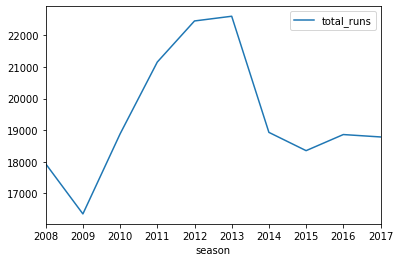

In [41]:
season.plot()


In [73]:
avg_runs=df.groupby('season')['id'].count().reset_index().rename(columns={'id':'matches'})
avg_runs


season  matches
0    2008       58
1    2009       57
2    2010       60
3    2011       73
4    2012       74
5    2013       76
6    2014       60
7    2015       59
8    2016       60
9    2017       59

In [74]:
season.reset_index(inplace=True)

In [75]:
pd.concat([avg_runs,season.iloc[:,1]],axis=1)
season

level_0  index  season  matches  matches
0        0      0    2008       58       58
1        1      1    2009       57       57
2        2      2    2010       60       60
3        3      3    2011       73       73
4        4      4    2012       74       74
5        5      5    2013       76       76
6        6      6    2014       60       60
7        7      7    2015       59       59
8        8      8    2016       60       60
9        9      9    2017       59       59

In [77]:
#season['per_match_runs']=season['total_runs']/season['matches']